# Análise Exploratória de Dados 
## | Prevendo Evasão e o Sucesso Acadêmico de Aunos do Ensino Superior

### > **Objetivo do Notebook**: 

Este notebook é parte de um conjunto de quatro notebooks focados para estudar os dados, entender suas características, conduzir uma análise da variáveis e seus relacionamentos, modelar dois modelos de classificação baseados em técnicas distintas e por fim avaliar o modelo de melhor desempenho. O foco particular deste notebook é de analisar o conjunto de dados para entender suas principais características, identificar padrões, outliers e preparar insights iniciais para modelagem.

### > **Fonte do Dados**: 

O dataset presente nos arquivos do projeto foi extraído da competição do Kaggle <a href="https://www.kaggle.com/competitions/playground-series-s4e6/data">Classification with an Academic Success Dataset</a>  gerado a partir de um modelo de aprendizagem profunda treinado no conjunto de dados <a href="https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success">Predict Students' Dropout and Academic Success</a>. As distribuições de *features* são próximas, mas não exatamente iguais, aos do original.

### > **Problemática do Projeto**:

No Brasil no ano de 2024, dados do Mapa do Ensino Superior organizado pelo <a href="https://www.semesp.org.br/instituto/home/">Instituto Semesp</a>, apontam que cerca de **57% dos estudantes** [1] que ingressam em cursos superiores acabam abandonando seus estudos antes da conclusão. Essa taxa inclui tanto instituições públicas quanto privadas e abrange modalidades presenciais e a distância. 

Em números absolutos, a evasão é expressiva, com estimativas indicando que quase **3,5 milhões de alunos deixaram o ensino superior** [2] em 2021 apenas nas instituições privadas, tornando o abandono um dos grandes desafios do setor educacional brasileiro. O fenômeno se agrava em modalidades como o ensino a distância (EaD), que teve uma taxa de evasão de **36,6%**, próxima ao ensino presencial [1].

O projeto em questão propõe desenvolver um modelo preditivo que, com base em dados históricos e padrões identificados, possa prever quais alunos estão em risco de evasão. Esse sistema visa oferecer às instituições de ensino superior uma ferramenta para identificar estudantes com alta propensão ao abandono, possibilitando intervenções precoces e personalizadas que contribuam para a redução das taxas de evasão. Ao apoiar as universidades na aplicação de estratégias direcionadas de retenção, o modelo busca criar um impacto positivo e duradouro na educação superior brasileira.

Fonte: <a href="https://www.correiobraziliense.com.br/euestudante/ensino-superior/2024/05/6852929-ensino-superior-no-brasil-tem-57-de-evasao-na-rede-publica-e-privada.html">[1]</a>, <a href="https://g1.globo.com/educacao/noticia/2022/01/02/quase-35-milhoes-de-alunos-evadiram-de-universidades-privadas-no-brasil-em-2021.ghtml">[2]</a>

<a name="índice"></a>
# | Índice

1. [Preparação dos Dados](#preparacao)
   - 1.1 [Importando Bibliotecas](#bibliotecas)
   - 1.2 [Carregando a Base de Dados](#dados)
2. [Exploração dos Dados](#exploracao)
   - 2.1 [Dicionário](#dicionário)
   - 2.2 [Informações Gerais dos Dados](#info)
   - 2.3 [Relatório dos Dados](#relatorio)
3. [Análise de Univariada](#univariada)
   - 3.1 [Analisando Variáveis Contínuas](#ucontinuas)
   - 3.2 [Analisando Variáveis Categóricas](#ucategoricas)
4. [Análise Bivariada](#bivariada)
   - 4.1 [Analisando Variáveis Contínuas](#bcontinuas)
   - 4.2 [Analisando Variáveis Categóricas](#bcategoricas)
5. [Insights](#insights)
6. [Próximos Passos](#prox)

<a name="preparacao"></a>
# | Preparação dos Dados

Como primeira etapa do nosso trabalho, vamos começar importando as **bibliotecas** necessárias para a preparação dos dados para a análise e modelagem.

<a name="bibliotecas"></a>
## | Importando Bibliotecas

Nesse notebook, vamos utilizar as seguintes ferramentas com os respectivos propósitos:
- **numpy**: operações matemáticas
- **pandas**: manipulação de dados tabulares
- **seaborn**: criação de gráficos
- **matplotlib**: criação de gráficos
- **scipy**: aplicação de fórmulas matemáticas
- **ydata_profiling**: criação de relatórios


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr

from ydata_profiling import ProfileReport

%matplotlib inline
pd.option_context('mode.use_inf_as_na', True)

<a name="dados"></a>
## | Carregando Dados

Agora vamos extrair os dados do respectivo diretório do projeto e visualizar sua estrutura.

In [2]:
df = pd.read_csv('../data/raw/train.csv')
df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<a name="exploracao"></a>
# | Exploração dos Dados

Antes de iniciarmos a exploração dos dados, vamos observar abaixo o **dicionário dos dados** que nos ajudará a identificar as **classes** de cada coluna categórica presente no dataset. As classes estão representadas por números no dataset e estão separadas por barras no dicionário abaixo. O dicionário em questão foi extraído do site original onde os dados podem ser encontrados, ele foi traduzido para facilitar a leitura.

[Retornar ao Índice](#índice)

<a name="dicionário"></a>
## | Dicionário de Dados
| Nome da Variável | Tradução | Papel | Tipo | Descrição |
| ---------------- | -------- | ----- |----- | --------- |
| Marital Status | Estado Civil | Feature | Integer | 1 - solteiro / 2 - casado / 3 - viúvo / 4 - divorciado / 5 - união estável / 6 - legalmente separado |
| Application mode | Forma de Aplicação | Feature | Integer | 1 – 1ª fase – contingente geral   / 2 – Portaria nº 612/93 / 5 - 1ª fase - contingente especial (Ilha dos Açores) / 7 - Titulares de outros cursos superiores / 10 - Portaria nº 854-B/99 / 15 - Estudante internacional (bacharelado) / 16 – 1ª fase – contingente especial (Ilha da Madeira) / 17 – 2ª fase – contingente geral / 18 – 3ª fase – contingente geral / 26 - Portaria n.º 533-A/99, alínea b2) (Plano Diferente) / 27 - Portaria nº 533-A/99, item b3 (Outra Instituição) / 39 - Maiores de 23 anos / 42 - Transferência / 43 – Mudança de curso / 44 - Titulares de diploma de especialização tecnológica / 51 - Mudança de instituição/curso / 53 - Titulares de diplomas de ciclo curto / 57 - Mudança de instituição/curso (Internacional)
| Application order | Ordem de Aplicação | Feature | Integer | Ordem de aplicação (entre 0 - primeira escolha; e 9 última escolha)
| Course | Curso | Feature | Integer | 33 - Tecnologias de Produção de Biocombustíveis / 171 - Animação e Design Multimédia / 8014 - Serviço Social (atendimento noturno) / 9003 - Agronomia / 9070 - Design de Comunicação / 9085 - Enfermagem Veterinária / 9119 - Engenharia Informática / 9130 - Equinicultura / 9147 - Gestão / 9238 - Serviço Social / 9254 - Turismo / 9500 - Enfermagem / 9556 - Higiene Oral / 9670 - Gestão de Publicidade e Marketing / 9773 - Jornalismo e Comunicação / 9853 - Ensino Básico / 9991 - Gestão (atendimento noturno) 
| Daytime/evening attendance | Atendimento diurno/noturno | Feature | Integer | 1 - diurno / 0 - noturno |
| Previous qualification | Qualificação Anterior | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Previous qualification (grade) | Nota da Qualificação Anterior | Feature | Integer | Nota da qualificação anterior (entre 0 e 200) |
| Nacionality | Nacionalidade | Feature | Integer | 1 - Português / 2 - Alemão / 6 - Espanhol / 11 - Italiano / 13 - Holandês / 14 - Inglês / 17 - Lituano / 21 - Angolano / 22 – Cabo-verdiano / 24 - Guineense / 25 – Moçambicano /26 - Santomense / 32 - Turco / 41 - brasileiro / 62 - romeno / 100 - Moldávia (República da) / 101 - Mexicano / 103 - Ucraniano / 105 - Russo / 108 - Cubano / 109 - Colombiano |
| Mother's qualification | Qualificação da Mãe | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Father's qualification | Qualificação do Pai | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Mother's occupation | Ocupação da Mãe | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Father's occupation | Ocupação do Pai | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Admission grade | Nota de Admissão | Feature | Float | Nota de admissão (entre 0 e 200) | 
| Displaced | Deslocado | Feature | Integer | 1 - sim / 0 - não |
| Educational special needs | Necessidadss Educacionais Especiais | Feature | Integer | 1 - sim / 0 - não |
| Debtor | Devedor | Feature | Integer | 1 - sim / 0 - não |
| Tuition fees up to date | Mensalidades em Dia | Feature | Integer | 1 - sim / 0 - não |
| Gender | Gênero | Feature | Integer | 1 - masculino / 0 - feminino |
| Scholarship holder | Bolsista | Feature | Integer | 1 - sim / 0 - não |
| Age at enrollment | Idade na Matrícula | Feature | Integer | Idade do aluno na matrícula |
| International | Estudante Internacional | Feature | Integer | 1 - sim / 0 - não |
| Curricular units 1st sem (credited) | Unidades curriculares 1º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 1.º semestre |
| Curricular units 1st sem (enrolled) | Unidades curriculares 1º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 1.º semestre |
| Curricular units 1st sem (evaluations) | Unidades curriculares 1º semestre (avaliações) | Feature | Integer |  Número de avaliações a unidades curriculares no 1.º semestre ||
| Curricular units 1st sem (approved) | Unidades curriculares 1º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 1.º semestre |
| Curricular units 1st sem (grade) | Unidades curriculares 1º semestre (nota) | Feature | Float | Média de notas do 1.º semestre (entre 0   20 | 
| Curricular units 1st sem (without evaluations) | Unidades curriculares 1º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 1.º semestre |
| Curricular units 2nd sem (credited) | Unidades curriculares 2º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 2.º semestre |
| Curricular units 2nd sem (enrolled) | Unidades curriculares 2º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 2.º semestre 
| Curricular units 2nd sem (evaluations) | Unidades curriculares 2º semestre (avaliações) | Feature | Integer | Número de avaliações a unidades curriculares no 2.º semestre |
|  Curricular units 2nd sem (approved) | Unidades curriculares 2º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 2.º semestre |
| Curricular units 2nd sem (grade) | Unidades curriculares 2º semestre (nota) | Feature | Float | Média de notas do 2.º semestre (entre 0 e 20| 
| Curricular units 2nd sem (without evaluations) | Unidades curriculares 2º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 2.º semestre |
| Unemployment rate | Taxa de Desemprego | Feature | Float | Taxa de Desemprego (%) |
| Inflation rate | Taxa de Inflação | Feature | Float | Taxa de Inflação (%) |
| GDP | PIB | Feature | Float | PIB |
| Target | Variável-alvo | Target | Object |Três categorias (abandono, matriculado e graduado) que descrevem a situação do aluno ao final da duração normal do curso |s

<a name="info"></a>
## | Informações Gerais dos Dados
Agora que passamos pelo dicionário dos dados, vamos visualizar a estrutura do **dataset** para compreender melhor os dados.

[Retornar ao Índice](#índice)

In [3]:
print(f'Nosso dataset contêm:\n{df.shape[0]} linhas')
print(f'{df.shape[1]} colunas')

Nosso dataset contêm:
76518 linhas
38 colunas


Abaixo, vamos verificar a consistência dos dados existências dados

In [4]:
# Cria um dataframe para verificar se existe items nulos nas colunas
pd.DataFrame(index=[col for col in df], data=[df[col].isna().unique() for col in df])[0].unique()

array([False])

In [5]:
# Verifica os tipos dos dados
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [6]:
# Verifica se existe linhas duplicas
df.duplicated().unique()

array([False])

In [7]:
# Resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

Conforme observado, os dados são **consistentes**, sem valores ausentes ou linhas duplicadas. Além disso, todas as variáveis explicativas são do tipo **numérico**, abrangendo apenas números inteiros e pontos flutuantes, o que garante uma base adequada para as próximas etapas da análise.

<a name="relatorio"></a>
## | Relatórios dos Dados

Para finalizar essa etapa, vamos criar um relatório do **dataset** utilizando a biblioteca **ydata_profiling** e usaremos o mesmo para aprofundar a nossa análise em propriedades específicas dos dados.

[Retornar ao Índice](#índice)

In [29]:
# Criando o relatório
profile = ProfileReport(df, title='Relatório de Análise Exploratória', explorative=True)

# Salvando os relatórios na pasta de relatórios do projeto
profile.to_file('../reports/Relatório_Análise_Exploratória.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

O relatório revela propriedades do nosso **dataset** que são importantes pontuar:

- Existem várias correlações fortes entre múltiplas variáveis, principalmente entre as variáveis relacionadas diretamente ao desempenho do aluno no 1º e 2º semestre
- Existe uma forte correlação entre essas mesmas variáveis de desempenho com a nossa variável **Target**
- Temos variáveis categóricas (qualitativas) altamente **desbalanceadas**, o que pode introduzir um viés ao nosso modelo

<a name="univariada"></a>
# | Análise Univariada 

A partir das informações acima, podemos começar a explorar as variáveis do nosso dataset de forma individual. Mas para essa etapa e as seguintes, vamos discriminar no nosso dataset quais variáveis são **contínuas** e quais são **categóricas**.
[Retornar ao Índice](#índice)

In [8]:
# Criando uma cópia do dataframe original para não comprometer os dados
df_exp = df.copy()

# Selecionando manualmente todas as variáveis contínuas do dataset
cols_continuas = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    ]

# Visualizando subgrupo de variáveis contínuas
df_exp[cols_continuas].head(5)

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,126.0,122.6,18,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,125.0,119.8,18,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,137.0,144.7,18,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,131.0,126.1,18,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,132.0,120.1,18,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32


In [9]:
# Visualizando subgrupo de variáveis categóricas
df_exp.drop(cols_continuas, axis=1).head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,0,1,1,1,9238,1,1,1,1,19,5,5,0,0,0,1,0,1,0,Graduate
1,1,1,17,1,9238,1,1,1,19,19,9,9,1,0,0,1,0,0,0,Dropout
2,2,1,17,2,9254,1,1,1,3,19,2,3,0,0,0,1,1,0,0,Dropout
3,3,1,1,3,9500,1,1,1,19,3,3,2,1,0,0,1,0,1,0,Enrolled
4,4,1,1,2,9500,1,1,1,19,37,4,9,1,0,0,1,0,0,0,Graduate


<a name="ucontinuas"></a>
## | Analisando Variáveis Contínuas

Vamos conduzir uma análise das variáveis **contínuas**, são essas todas as variáveis que descrevem uma propriedade mensurável do aluno. Vamos verificar a média, mediana, desvio padrão e outras informações estatisticamente relevante para o projeto.

[Retornar ao Índice](#índice)

In [10]:
# Visualizando resumo
df_exp[cols_continuas].describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,132.378766,125.363971,22.278653,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,10.995328,12.562328,6.889241,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,118.000000,18.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,124.600000,19.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,140.000000,132.000000,23.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


Com base no relatório criado na etapa anterior, sabemos que dessas variáveis as mais interessantes para o nosso objetivo de prever se o aluno irá abandonar o curso ou não, são as variáveis com a correlação mais alta com **Target**, no relatório essas foram:
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (grade)
- Curricular units 1st sem (approved)
- Curricular units 2nd sem (enrolled)
- Curricular units 2nd sem (grade)
- Curricular units 2nd sem (approved)

No entanto, vamos extender a nossa análise também para as seguintes variáveis:
- Age at enrollment
- Admission grade
- Previous qualification (grade)
- Unemployment rate
- Inflation rate
- GDP

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


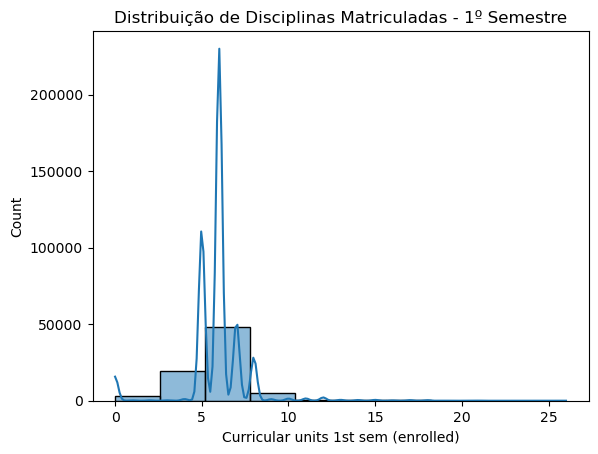

count    76518.000000
mean         5.891516
std          1.671776
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         26.000000
Name: Curricular units 1st sem (enrolled), dtype: float64


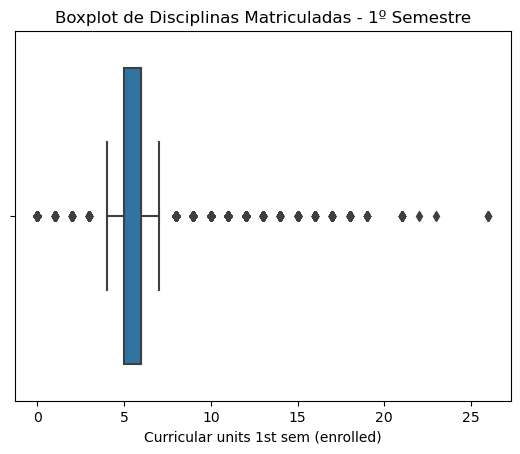

In [17]:
# Histograma para o número de disciplinas matriculadas no 1º semestre
sns.histplot(df_exp['Curricular units 1st sem (enrolled)'], kde=True, bins=10)
plt.title('Distribuição de Disciplinas Matriculadas - 1º Semestre')
plt.show()

# Estatísticas descritivas
print(df_exp['Curricular units 1st sem (enrolled)'].describe())

# Boxplot
sns.boxplot(x=df_exp['Curricular units 1st sem (enrolled)'])
plt.title('Boxplot de Disciplinas Matriculadas - 1º Semestre')
plt.show()

- Melhorar gráficos acima
- Repetir para disciplinas do 2º semestre
- Adicionar comentários

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


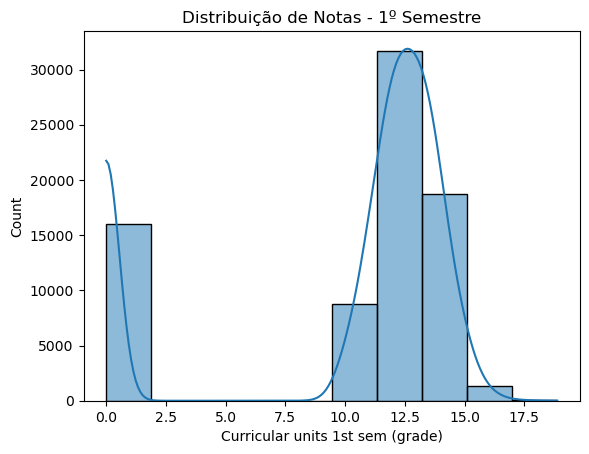

count    76518.000000
mean         9.995862
std          5.264224
min          0.000000
25%         10.666667
50%         12.166667
75%         13.314286
max         18.875000
Name: Curricular units 1st sem (grade), dtype: float64


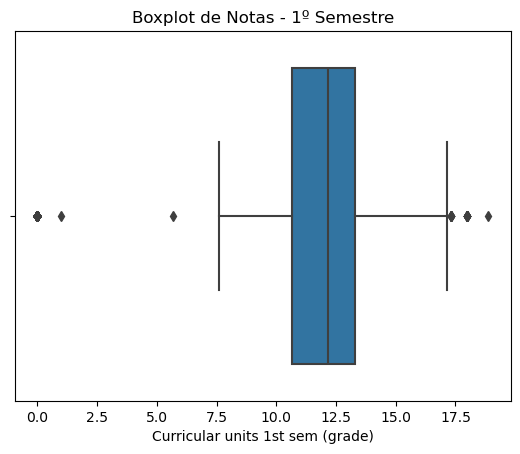

In [18]:
# Histograma para as notas do 1º semestre
sns.histplot(df_exp['Curricular units 1st sem (grade)'], kde=True, bins=10)
plt.title('Distribuição de Notas - 1º Semestre')
plt.show()

# Estatísticas descritivas
print(df_exp['Curricular units 1st sem (grade)'].describe())

# Boxplot
sns.boxplot(x=df_exp['Curricular units 1st sem (grade)'])
plt.title('Boxplot de Notas - 1º Semestre')
plt.show()


- Melhorar gráficos acima
- Repetir para notas do 2º semestre
- Adicionar comentários

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


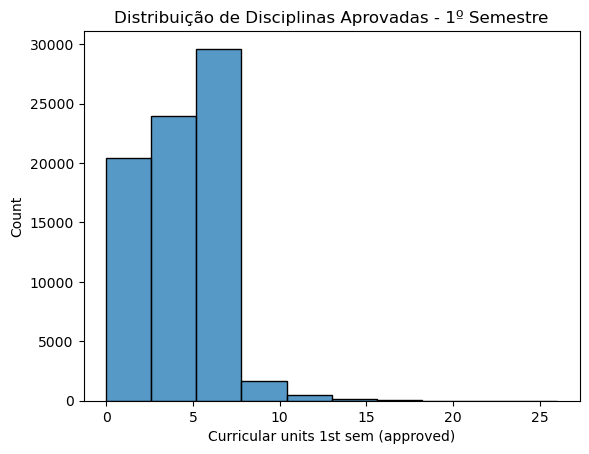

Porcentagem média de aprovação no 1º semestre: inf%


In [19]:
# Histograma para o número de disciplinas aprovadas no 1º semestre
sns.histplot(df_exp['Curricular units 1st sem (approved)'], kde=False, bins=10)
plt.title('Distribuição de Disciplinas Aprovadas - 1º Semestre')
plt.show()

# Porcentagem média de aprovação
percent_aprovacao = (df_exp['Curricular units 1st sem (approved)'] / 
                     df_exp['Curricular units 1st sem (enrolled)']).mean() * 100
print(f"Porcentagem média de aprovação no 1º semestre: {percent_aprovacao:.2f}%")


- Melhorar gráficos acima
- Repetir para disciplinas aprovadas do 2º semestre
- Adicionar comentários

count    76518.000000
mean        22.278653
std          6.889241
min         17.000000
25%         18.000000
50%         19.000000
75%         23.000000
max         70.000000
Name: Age at enrollment, dtype: float64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


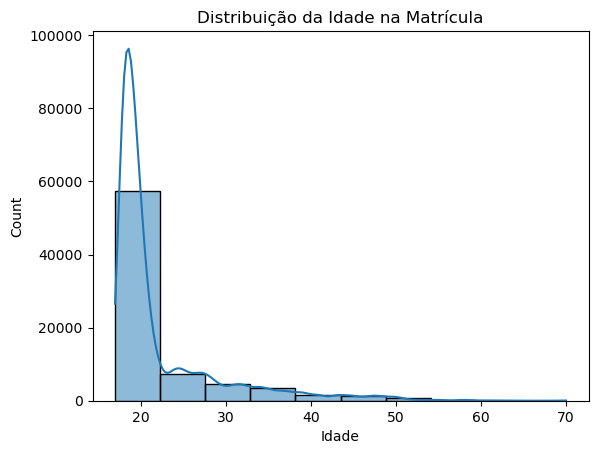

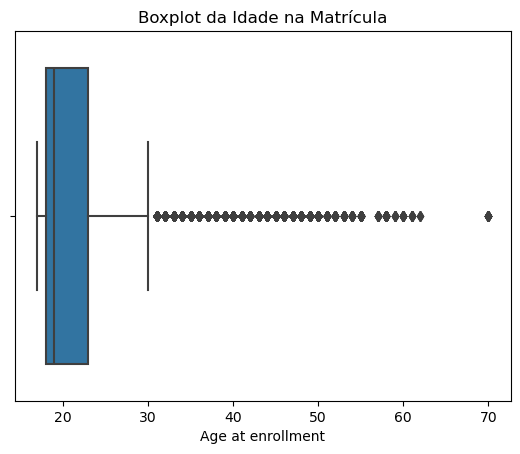

In [21]:
# Estatísticas descritivas
print(df_exp['Age at enrollment'].describe())

# Histograma para a idade de matrícula
sns.histplot(df_exp['Age at enrollment'], kde=True, bins=10)
plt.title('Distribuição da Idade na Matrícula')
plt.xlabel('Idade')
plt.show()

# Boxplot para identificar outliers
sns.boxplot(x=df_exp['Age at enrollment'])
plt.title('Boxplot da Idade na Matrícula')
plt.show()


- Melhorar gráfico
- Adicionar comentários

count    76518.000000
mean       125.363971
std         12.562328
min         95.000000
25%        118.000000
50%        124.600000
75%        132.000000
max        190.000000
Name: Admission grade, dtype: float64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


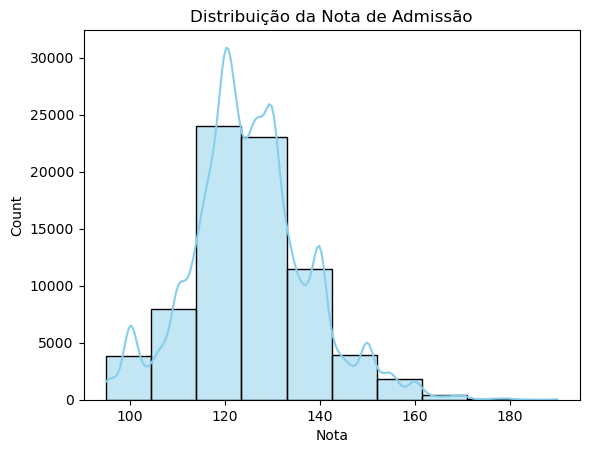

In [22]:
# Estatísticas descritivas
print(df_exp['Admission grade'].describe())

# Histograma com densidade
sns.histplot(df_exp['Admission grade'], kde=True, bins=10, color='skyblue')
plt.title('Distribuição da Nota de Admissão')
plt.xlabel('Nota')
plt.show()


- Melhorar gráfico
- Adicionar comentários

count    76518.000000
mean       132.378766
std         10.995328
min         95.000000
25%        125.000000
50%        133.100000
75%        140.000000
max        190.000000
Name: Previous qualification (grade), dtype: float64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


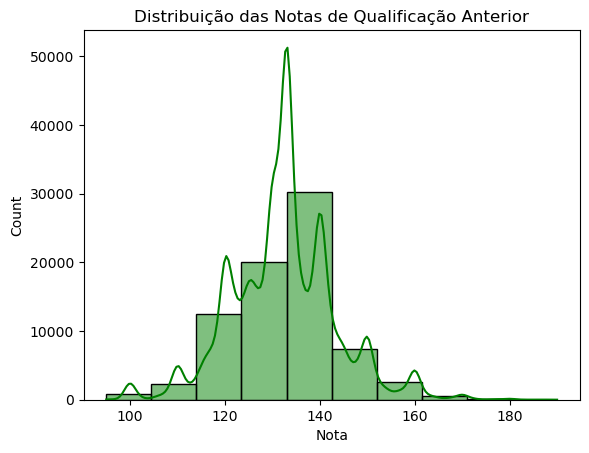

In [23]:
# Estatísticas descritivas
print(df_exp['Previous qualification (grade)'].describe())

# Histograma com densidade
sns.histplot(df_exp['Previous qualification (grade)'], kde=True, bins=10, color='green')
plt.title('Distribuição das Notas de Qualificação Anterior')
plt.xlabel('Nota')
plt.show()


- Melhorar gráfico
- Adicionar comentários

count    76518.000000
mean        11.520340
std          2.653375
min          7.600000
25%          9.400000
50%         11.100000
75%         12.700000
max         16.200000
Name: Unemployment rate, dtype: float64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


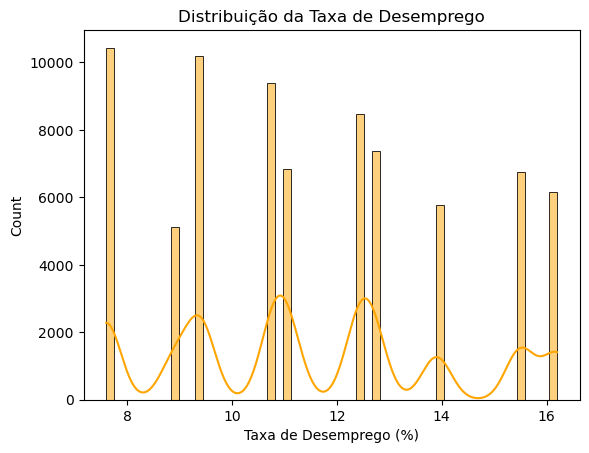

In [24]:
# Estatísticas descritivas
print(df_exp['Unemployment rate'].describe())

# Histograma para taxas de desemprego
sns.histplot(df_exp['Unemployment rate'], kde=True, color='orange')
plt.title('Distribuição da Taxa de Desemprego')
plt.xlabel('Taxa de Desemprego (%)')
plt.show()


- Melhorar gráfico
- Adicionar comentários

count    76518.000000
mean         1.228218
std          1.398816
min         -0.800000
25%          0.300000
50%          1.400000
75%          2.600000
max          3.700000
Name: Inflation rate, dtype: float64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


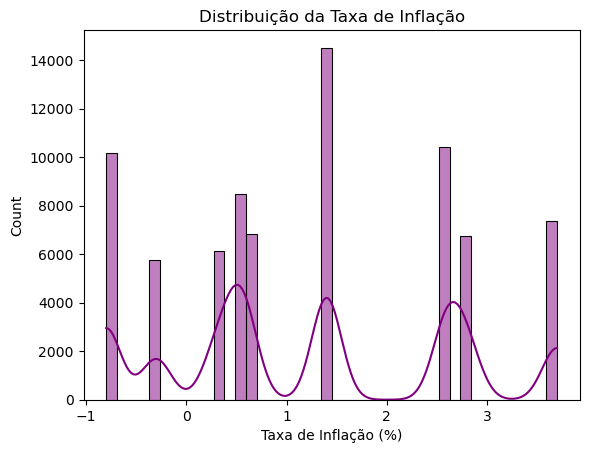

In [25]:
# Estatísticas descritivas
print(df_exp['Inflation rate'].describe())

# Histograma
sns.histplot(df_exp['Inflation rate'], kde=True, color='purple')
plt.title('Distribuição da Taxa de Inflação')
plt.xlabel('Taxa de Inflação (%)')
plt.show()


- Melhorar gráfico
- Adicionar comentários

count    76518.000000
mean        -0.080921
std          2.251382
min         -4.060000
25%         -1.700000
50%          0.320000
75%          1.790000
max          3.510000
Name: GDP, dtype: float64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


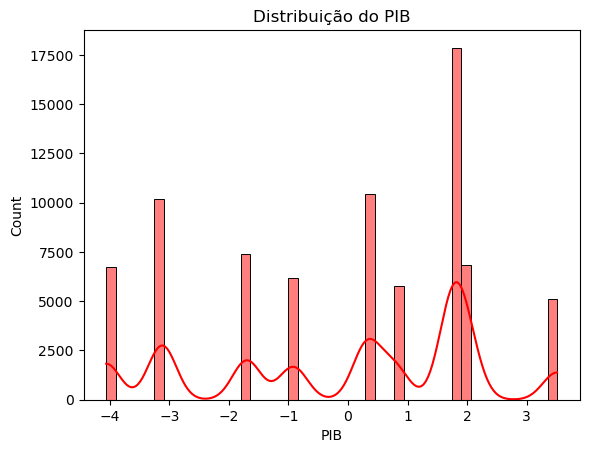

In [26]:
# Estatísticas descritivas
print(df_exp['GDP'].describe())

# Histograma para o PIB
sns.histplot(df_exp['GDP'], kde=True, color='red')
plt.title('Distribuição do PIB')
plt.xlabel('PIB')
plt.show()


- Melhorar gráfico
- Adicionar comentários

<a name="bcategoricas"></a>
## | Analisando Variáveis Categóricas

[Retornar ao Índice](#índice)

<a name="bivariada"></a>
# | Análise Bivariada

[Retornar ao Índice](#índice)

<a name="bcontinuas"></a>
## | Analisando Variáveis Contínuas

[Retornar ao Índice](#índice)

Como estamos trabalhando com variáveis contínuas e uma variável categórica, vamos usar o **Coeficiente de Correlação de Ponto Biserial** para determinar a relação dessas variáveis de alta correlação entre si com a nossa variável **Target** 

O coeficiente de correlação de ponto biserial é uma extensão do coeficiente de correlação de Pearson para medir a associação entre uma variável contínua e uma binária. Ele é apropriado quando a variável binária representa uma classificação verdadeira. A fórmula desse coeficiente é dado por:

$$\gamma_{pb}=\frac{\overline X_1 - \overline X_0}{s_X}\cdot\sqrt{\frac{p(1-p)}{n}}$$

Onde:
- $\overline X_1$ e $\overline X_0$ são as médias da variável contínua para os grupos 1 e 0 da variável binária
- $s_X$ é o desvio padrão da variável contínua
- $p$ é a proporção de casos no grupo 1
- $n$ é o tamanho da amostra

  

In [29]:
cor = pd.DataFrame([(col, *pointbiserialr(df_exp['y'], df_exp[col])) for col in df_exp[cont_cols]], columns=['Variável', 'Correlação com y', 'P-value'])
cor

,Variável,Correlação com y,P-value
0,Previous qualification,0.084937,1.695166e-122
1,Previous qualification (grade),-0.090179,6.807150e-138
2,Admission grade,-0.133493,3.745972e-301
3,Age at enrollment,0.330870,0.000000e+00
4,Curricular units 1st sem (credited),-0.026679,1.569943e-13
5,Curricular units 1st sem (enrolled),-0.228257,0.000000e+00
6,Curricular units 1st sem (evaluations),-0.243344,0.000000e+00
7,Curricular units 1st sem (approved),-0.689017,0.000000e+00
8,Curricular units 1st sem (grade),-0.681377,0.000000e+00
9,Curricular units 1st sem (without evaluations),0.047391,2.648959e-39


Avaliando a relação acima, vamos extrair apenas as variáveis com as correlações mais relevantes com nossa variável resposta **y**, seriam essas:
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)

Antes de prosseguirmos para as variáveis **categóricas** do modelo, vamos observar essas quatro variáveis contínuas em particular.

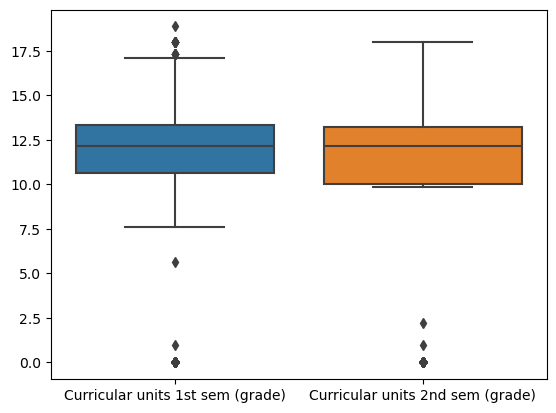

In [31]:
# Gráfico de notas do primeiro semestre comparado com notas do segundo semestre
sns.boxplot(df_exp[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']])
plt.show()

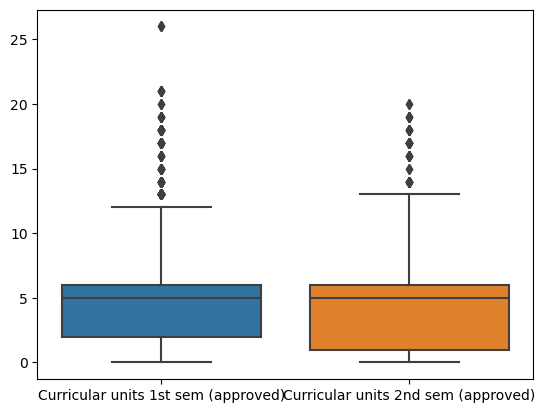

In [32]:
# Gráfico de quantidade de disciplinadas aprovadas no primeiro semestre comparado ao segundo semetre
sns.boxplot(df_exp[['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']])
plt.show()

Como podemos observar acima, existem alguns **outliers** nos nosso dados, vamos observar se esses outliers afetam nossa variável resposta ou não na próxima seccção. Agora vamos observar o impacto das quatro variáveis de acordo com a categoria: **Dropout** e **Not Dropout**

In [34]:
df_exp['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [71]:
df_exp['Dropout'] = df_exp['Target'].map({'Graduate': False, 'Enrolled': False, 'Dropout': True})

grades = (df_exp[['Dropout', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
          .assign(avarage_by_student=(df_exp['Curricular units 1st sem (grade)'] + df_exp['Curricular units 2nd sem (grade)'])/2))

grades['avarage_by_category'] = df_exp['Dropout'].map(grades.groupby('Dropout')['avarage_by_student'].mean())

grades['resid'] = grades['avarage_by_student'] - grades['avarage_by_category']

grades.head(5)

,Dropout,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),avarage_by_student,avarage_by_category,resid
0,False,14.500000,12.428571,13.464286,12.520088,0.944198
1,True,11.600000,0.000000,5.800000,4.325274,1.474726
2,True,0.000000,0.000000,0.000000,4.325274,-4.325274
3,False,12.591250,12.820000,12.705625,12.520088,0.185537
4,False,12.933333,12.933333,12.933333,12.520088,0.413245


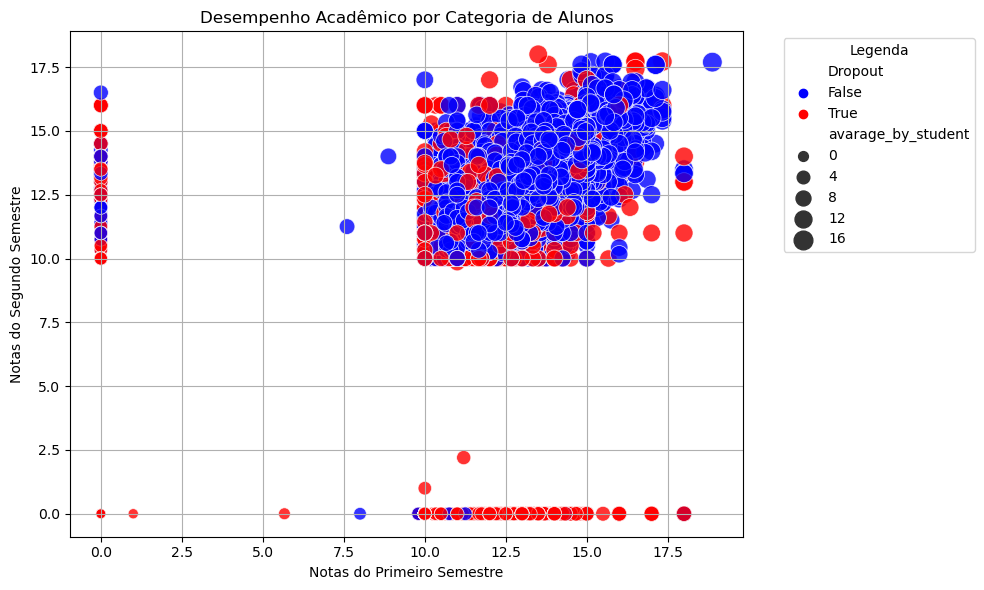

In [64]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=grades,
    x='Curricular units 1st sem (grade)',
    y='Curricular units 2nd sem (grade)',
    hue='Dropout',
    size='avarage_by_student',
    sizes=(50, 200),
    palette={True: 'red', False: 'blue'},
    alpha=0.8,
    legend='brief'
)

plt.title('Desempenho Acadêmico por Categoria de Alunos')
plt.xlabel('Notas do Primeiro Semestre')
plt.ylabel('Notas do Segundo Semestre')
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

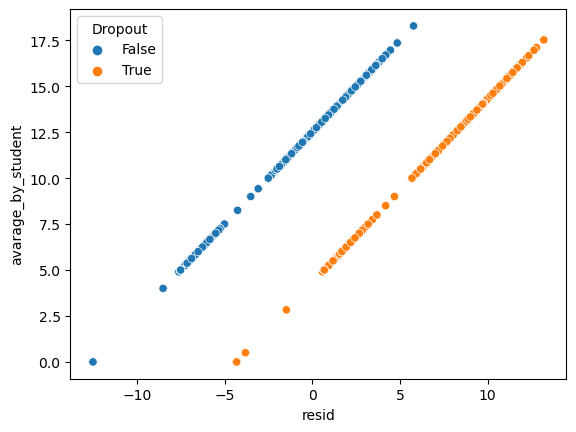

In [75]:
sns.scatterplot(
    data=grades,
    x='resid',
    y='avarage_by_student',
    hue='Dropout'
)

plt.show()

Como podemos observar acima, alunos que tiveram bom desempenho em ambos os semestres possuem a maior média de nota e não abandonaram o curso. No entanto, existem alunos que mesmo tirando notas consideravelmente boas em ambos os semestres, acabaram por abandonar os cursos, assim como existem exemplos de alunos que foram mal em um semestre e compensaram no outro, com a minoria desses casos não abandonando o curso. Observando os dados fica claro que precisamos de um novo eixo de informações para explicar a razão do abandono do ensino superior, então vamos analisar as outras variáveis com alta correlação com nossa variável resposta.

In [61]:
approved = (df_exp[['Dropout', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']]
          .assign(avarage_by_student=(df_exp['Curricular units 1st sem (approved)'] + df_exp['Curricular units 2nd sem (approved)'])/2))

approved['avarage_by_category'] = df_exp['Dropout'].map(approved.groupby('Dropout')['avarage_by_student'].mean())

approved.head(5)

,Dropout,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),avarage_by_student,avarage_by_category
0,False,6,6,6.0,5.455869
1,True,4,0,2.0,1.332898
2,True,0,0,0.0,1.332898
3,False,7,7,7.0,5.455869
4,False,6,6,6.0,5.455869


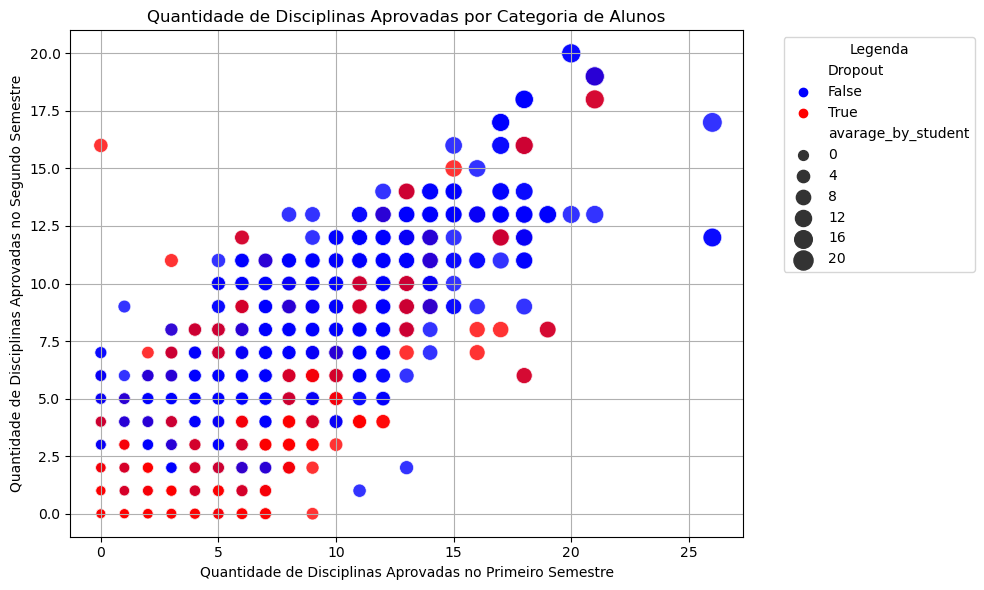

In [65]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=approved,
    x='Curricular units 1st sem (approved)',
    y='Curricular units 2nd sem (approved)',
    hue='Dropout',
    size='avarage_by_student',
    sizes=(50, 200),
    palette={True: 'red', False: 'blue'},
    alpha=0.8,
    legend='brief'
)

plt.title('Quantidade de Disciplinas Aprovadas por Categoria de Alunos')
plt.xlabel('Quantidade de Disciplinas Aprovadas no Primeiro Semestre')
plt.ylabel('Quantidade de Disciplinas Aprovadas no Segundo Semestre')
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Observando os dados acimas, a quantidade de disciplinas aprovadas é bem maior para os alunos que não sairam do curso contra os alunos que sairam, os dados parecem estar mais dispersos nesse gráfico com os pontos azuis mais acima e os pontos vermelhos mais abaixos.

<a name="bcategoricas"></a>
## | Analisando Variáveis Categóricas

[Retornar ao Índice](#índice)

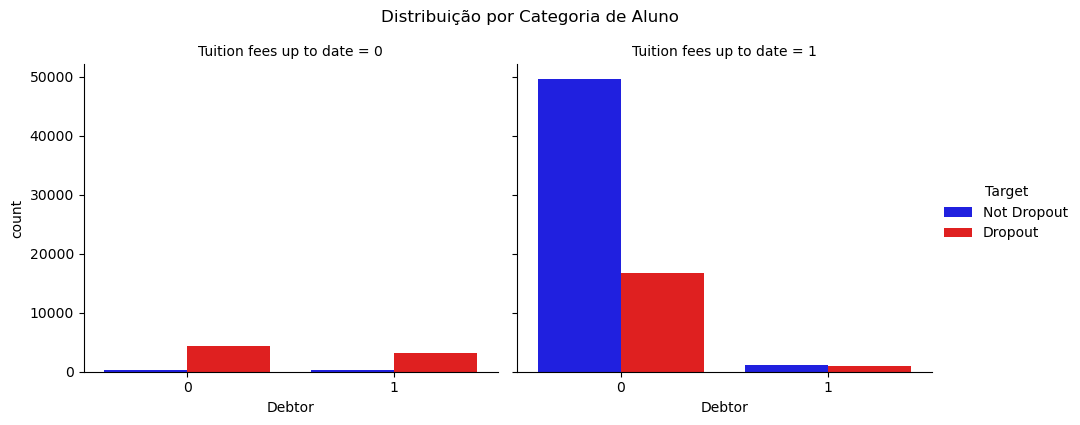

In [20]:
g = sns.catplot(
    data=df_exp,
    x='Debtor', hue='Target', col='Tuition fees up to date',
    palette={'Dropout': 'red', 'Not Dropout': 'blue'},
    kind='count',
    height=4, aspect=1.2
)
g.fig.suptitle('Distribuição por Categoria de Aluno', y=1.05)
plt.show()

In [21]:
from sklearn.utils import resample

grouped = df_exp.groupby(['Tuition fees up to date', 'Debtor'])

# Encontrando o tamanho máximo entre as combinações
max_size = grouped.size().max()

# Superamostragem para cada combinação
balanced_data = grouped.apply(
    lambda x: resample(x, replace=True, n_samples=max_size, random_state=412)
).reset_index(drop=True)

print(balanced_data.groupby(['Tuition fees up to date', 'Debtor']).size())

Tuition fees up to date  Debtor
0                        0         66386
                         1         66386
1                        0         66386
                         1         66386
dtype: int64


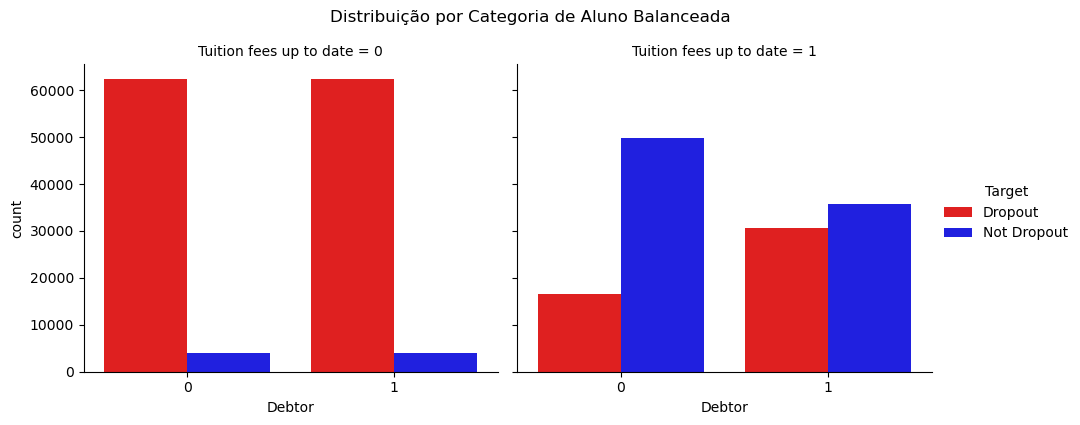

In [22]:
g = sns.catplot(
    data=balanced_data,
    x='Debtor', hue='Target', col='Tuition fees up to date',
    kind='count',
    palette={'Dropout': 'red', 'Not Dropout': 'blue'},
    height=4, aspect=1.2
)
g.fig.suptitle('Distribuição por Categoria de Aluno Balanceada', y=1.05)
plt.show()

Analisando ambos os gráficos acima, fica claro que alunos da classe **Dropout** são propensos a não manter os pagamentos em dia com a instituição, assim como são mais propensos a adiquirirem dívida com a mesma.

In [23]:
cols.extend(['Tuition fees up to date', 'Debtor'])

NameError: name 'cols' is not defined

In [ ]:
balanced_data[cols].corr()['y']

In [ ]:
cor_balanced = balanced_data.corr(numeric_only=True)['y']
cor_balanced

In [ ]:
pd.Series([cor_balanced[cor_balanced == row].index[0] if abs(row) > 0.18 else np.nan for row in cor_balanced]).dropna()

As variáveis acimas vão ser as nossas variáveis explicativas que vamos usar para explicar y.

<a name="insights"></a>
# | Insights

[Retornar ao Índice](#índice)

<a name="prox"></a>
# | Próximos Passos

[Retornar ao Índice](#índice)